In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
import numpy as np

users = pd.read_csv("users.csv", na_values='').rename(columns={'ID': 'user_id'})
users.head(2)

,user_id,bdate,age,city,country,last_seen_platform,last_seen_time,sex,verified,first_name,last_name,is_closed
0,303206,2000-09-16,NaN,Moscow,Russia,Android app,2024-06-07 07:30:54,1,0,Andrey,Rinchino,1
1,989742,2000-04-08,34.0,Moscow,Russia,iPhone app,2024-06-07 09:59:22,0,0,Irina,Lebed,0


In [2]:
user_posts = pd.read_csv("user_posts.csv")
user_posts.head(2)

,user_id,post_id,date,likes,comments,reposts,views,attachments,text
0,8100016,12169,2022-05-26 21:04:39,47,0,0,1676.0,1,Can we just talk a while until my worries disa...
1,8100016,12192,2024-06-01 09:33:34,0,0,0,139.0,0,Вдруг ктото видел


In [3]:
posts = pd.read_csv("posts.csv")
posts.head(10)

,post_id,date,likes,comments,reposts,views,attachments,text
0,2980,2024-04-19 16:00:03,10,0,6,1998,1,209
1,3068,2024-06-06 18:30:01,35,0,7,2359,2,102
2,3066,2024-06-01 14:40:00,8,0,3,576,1,100
3,3064,2024-05-31 14:10:00,30,0,9,1518,1,161
4,3062,2024-05-31 12:00:07,8,0,1,2279,4,101
5,3058,2024-05-30 17:10:00,46,1,6,4196,2,149
6,3056,2024-05-30 11:15:00,12,0,1,1701,1,48
7,3054,2024-05-29 18:00:05,8,0,1,458,1,97
8,3053,2024-05-29 14:42:00,8,0,1,432,1,66
9,3052,2024-05-29 14:40:00,7,0,1,400,1,76


In [4]:
post_likes = pd.read_csv("post_likes.csv")
post_likes.head(2)

,post_id,user_id
0,2980,260875449
1,2980,6052217


In [5]:
posts_amount = user_posts.groupby('user_id').size().reset_index().rename(columns={0:'post_number'})

users_info = users.merge(posts_amount, on='user_id', how='left')
top10 = users_info.sort_values('post_number', ascending=False).head(10)
top10['FI'] = top10[['first_name', 'last_name']].apply(lambda x: ' '.join(x), axis=1)
top10

,user_id,bdate,age,city,country,last_seen_platform,last_seen_time,sex,verified,first_name,last_name,is_closed,post_number,FI
280,214194108,2000-09-18,NaN,Tver,Russia,Android app,2024-06-07 09:57:53,1,0,Sasha,Nikulin,0,336.0,Sasha Nikulin
745,365929724,NaN,NaN,Moscow,Russia,iPhone app,2024-06-07 10:24:18,0,0,Angelina,Kiushkina,0,278.0,Angelina Kiushkina
952,488776814,2000-04-30,NaN,Kyōto,Japan,iPhone app,2024-06-07 10:06:23,1,0,Alexander,Frolov,0,272.0,Alexander Frolov
988,519362402,2000-06-04,42.0,Moscow,Russia,Full version,2024-06-06 17:52:43,1,0,Alexey,Sergievsky,0,255.0,Alexey Sergievsky
987,519362402,2000-06-04,42.0,Moscow,Russia,Full version,2024-06-06 17:52:43,1,0,Alexey,Sergievsky,0,255.0,Alexey Sergievsky
710,345847764,2000-07-18,22.0,Moscow,Russia,Full version,2024-06-07 02:12:10,1,0,Daniil,Antonov,0,221.0,Daniil Antonov
1132,846268686,2000-06-10,59.0,NaN,NaN,Android app,2024-06-07 10:03:56,1,0,Akhmed,Aliev,0,217.0,Akhmed Aliev
561,289908122,2000-05-28,19.0,NaN,Russia,Android app,2024-06-07 10:06:55,1,0,Mikhail,Brilliantov,0,191.0,Mikhail Brilliantov
375,237667447,2000-04-05,23.0,Moscow,Russia,iPhone app,2024-06-07 09:52:30,1,0,Mikhail,Malik,0,189.0,Mikhail Malik
920,464995719,2000-02-27,NaN,NaN,NaN,Full version,2024-06-06 22:49:20,1,0,Andrey,Shmygin,0,186.0,Andrey Shmygin


<Axes: xlabel='FI'>

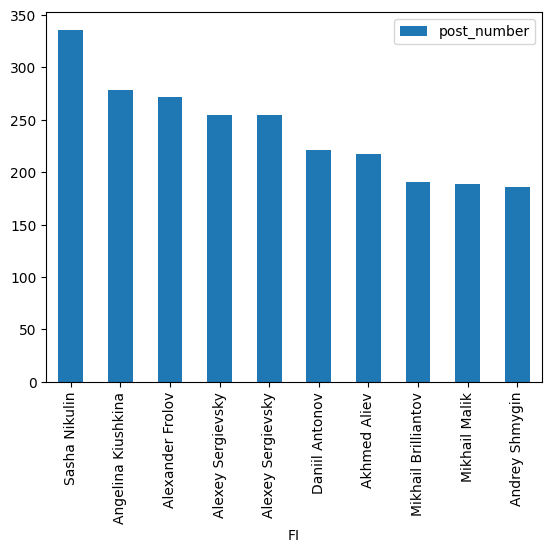

In [6]:

top10.plot.bar(x='FI', y='post_number')

In [204]:
users_info

,user_id,bdate,age,city,country,last_seen_platform,last_seen_time,sex,verified,first_name,last_name,is_closed,post_number
0,303206,2000-09-16,NaN,Moscow,Russia,Android app,2024-06-07 07:30:54,1,0,Andrey,Rinchino,1,NaN
1,989742,2000-04-08,34.0,Moscow,Russia,iPhone app,2024-06-07 09:59:22,0,0,Irina,Lebed,0,NaN
2,4510163,2000-11-18,NaN,Moscow,Russia,iPhone app,2024-06-07 10:02:22,0,0,Printsessa,Olga,0,NaN
3,5763938,2000-06-22,19.0,Moscow,Russia,Android app,2024-06-07 09:13:19,0,0,Anna,Solovyova,0,NaN
4,8100016,2000-09-21,30.0,Moscow,Russia,Full version,2024-06-06 15:32:50,0,0,Diana,Sarkisyan,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,835294600,2000-11-12,21.0,Moscow,Russia,Full version,2024-05-20 12:15:00,1,0,Temur,Popov,0,6.0
1130,842174539,2000-08-30,38.0,Moscow,Russia,Android app,2024-06-07 08:26:38,1,0,Kirill,Kraev,0,146.0
1131,845977738,2000-07-01,25.0,NaN,NaN,Android app,2024-06-06 17:40:33,1,0,Vladimir,Konovalov,0,4.0
1132,846268686,2000-06-10,59.0,NaN,NaN,Android app,2024-06-07 10:03:56,1,0,Akhmed,Aliev,0,217.0


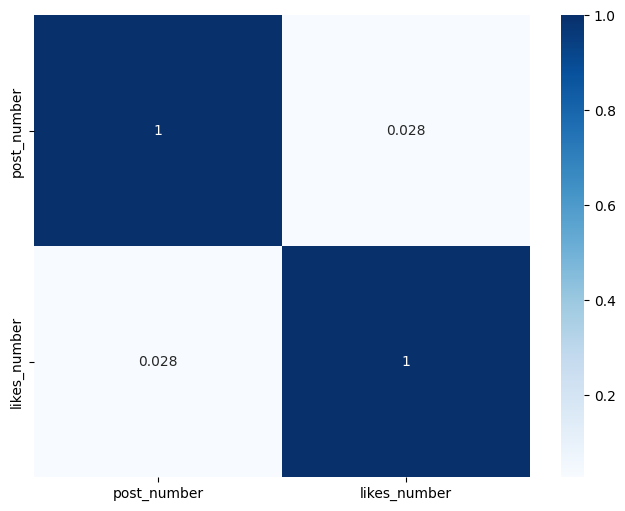

In [10]:
# adding activity in group 
likes = post_likes.groupby('user_id').size().reset_index().rename(columns={0:'likes_number'})

users_info_all = users_info.merge(likes, on='user_id', how='left')

info_filtered = users_info_all[users_info_all[['post_number', 'likes_number']].notnull().all(1)]


import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(info_filtered.iloc[:, -2:].corr(), annot=True, cmap='Blues')
plt.show()

In [8]:
# posts features correlation matrix

posts_data = posts.loc[:, ~posts.columns.isin(['date'])].set_index('post_id')
corr_df = posts_data.corr()

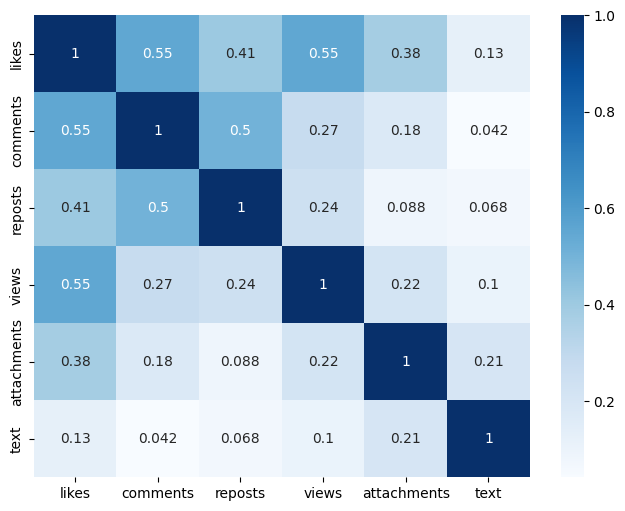

In [9]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='Blues')
plt.show()

In [135]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN


scaler = MinMaxScaler()
norm_data = pd.DataFrame(scaler.fit_transform(posts_data),columns= posts_data.columns) # нормализованные данные
norm_data.describe()


,likes,comments,reposts,views,attachments,text
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,0.116209,0.019387,0.010637,0.034249,0.128108,0.127073
std,0.124046,0.081848,0.039966,0.074554,0.126339,0.100564
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.026316,0.000000,0.002849,0.013133,0.111111,0.066773
50%,0.078947,0.000000,0.005698,0.020819,0.111111,0.116057
75%,0.166667,0.000000,0.008547,0.032363,0.111111,0.170111
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


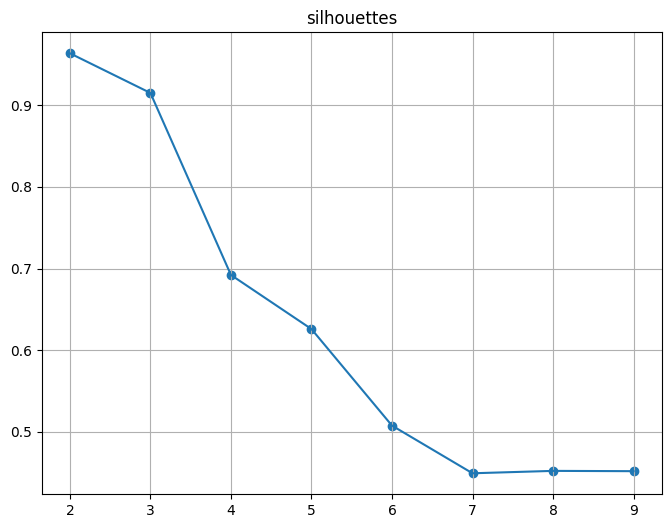

In [11]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



silhouettes = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++' , random_state=1)
    kmeans.fit(norm_data)
    silhouettes.append(silhouette_score(norm_data, kmeans.labels_))

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(range(2, 10), silhouettes)
ax.plot(range(2, 10), silhouettes)
ax.grid(True)
ax.set_title('silhouettes')

plt.show()

In [12]:
k_means = KMeans(n_clusters=3,init='k-means++', random_state=43) # 5345
k_means_clusters = k_means.fit_predict(norm_data)


#get unique values and counts of each value
unique, counts = np.unique(k_means_clusters, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  0 690]
 [  1  13]
 [  2   3]]


In [13]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', random_state=100).fit_transform(norm_data)
X_embedded.shape

(706, 2)

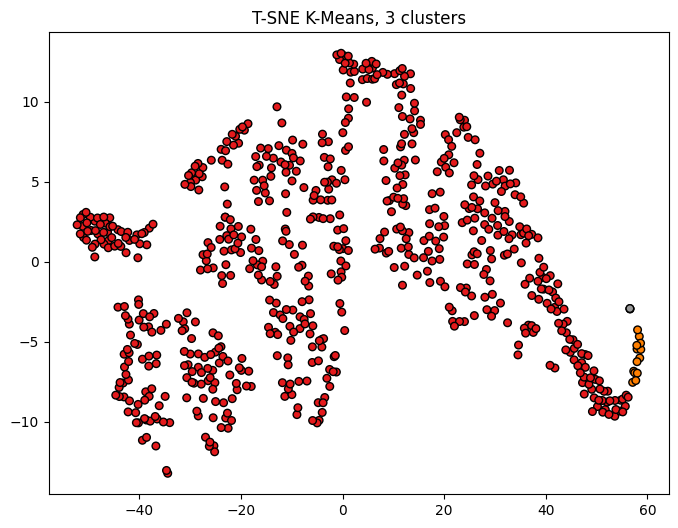

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], s=30, c=k_means_clusters, marker='o', cmap = 'Set1', edgecolors='black')
ax.set_title("T-SNE K-Means, 3 clusters")
plt.show()

In [209]:
# DBSCAN CLUSTERING # eps=0.2 min_samples=8 good result. minmax eps=0.1, min_samples=10, metric='l1' good perplexity 30

from sklearn.cluster import DBSCAN

DBScan = DBSCAN(eps=0.1, min_samples=20, metric='l1')
DB = DBScan.fit_predict(norm_data)

In [210]:
unique, counts = np.unique(DB, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[ -1 184]
 [  0 387]
 [  1 135]]


In [246]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', perplexity=130, random_state=101).fit_transform(norm_data)

(706, 2)

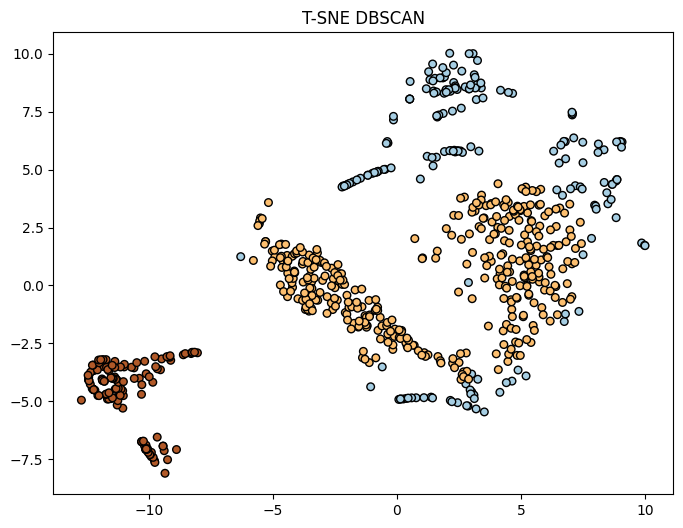

In [247]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], s=30, c=DB, marker='o', cmap = 'Paired', edgecolors='black')
ax.set_title("T-SNE DBSCAN")
plt.show()

In [49]:
# TSNE than DBSCAN

X_emb = TSNE(n_components=2, learning_rate='auto', perplexity=10, random_state=0).fit_transform(norm_data)
X_emb = pd.DataFrame(X_emb)

In [50]:
X_emb

,0,1
0,-5.020607,42.257385
1,24.251263,4.310771
2,-26.565201,20.333378
3,14.751604,27.862415
4,55.901081,7.734787
...,...,...
701,-14.719837,-53.882568
702,-42.202129,-8.091720
703,19.626381,-15.021712
704,-7.472025,57.958534


In [75]:
DBScan_ = DBSCAN(eps=0.01, min_samples=8, algorithm='auto', metric='cosine')
DB_ = DBScan_.fit_predict(X_emb)

In [76]:
unique_, counts_ = np.unique(DB_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique_, counts_)).T)

[[  0 354]
 [  1 315]
 [  2  37]]


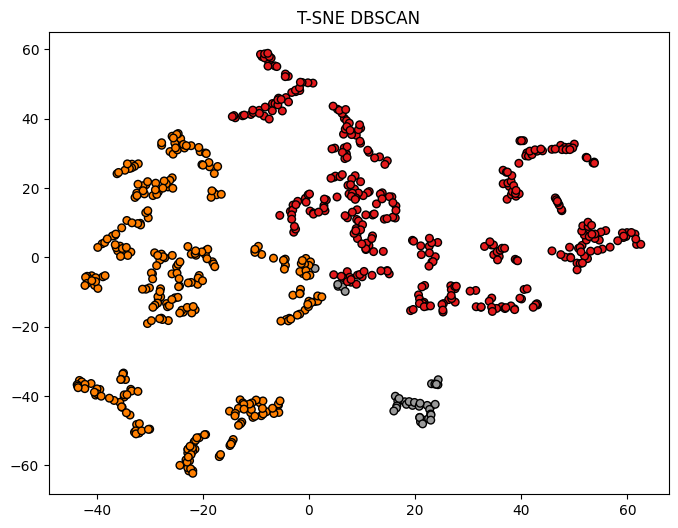

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_emb.iloc[:, 0], X_emb.iloc[:, 1], s=30, c=DB_, marker='o', cmap = 'Set1', edgecolors='black')
ax.set_title("T-SNE DBSCAN")
plt.show()

In [213]:
posts_data['label'] = DB

posts_data[posts_data['label'] == -1].describe().loc[['mean','std', 'min', 'max'], ~posts_data.columns.isin(['label'])]

,likes,comments,reposts,views,attachments,text
mean,24.684783,1.005435,7.891304,1391.945652,2.320652,116.282609
std,21.560908,2.401041,26.718306,2425.123925,1.606138,80.674591
min,2.000000,0.000000,0.000000,152.000000,0.000000,2.000000
max,116.000000,16.000000,351.000000,17740.000000,9.000000,630.000000


In [214]:
posts_data[posts_data['label'] == 0].describe().loc[['mean','std', 'min', 'max'], ~posts_data.columns.isin(['label'])]

,likes,comments,reposts,views,attachments,text
mean,13.356589,0.069767,2.516796,505.178295,1.0,87.377261
std,8.067846,0.255084,2.624437,224.219410,0.0,42.725989
min,2.000000,0.000000,0.000000,130.000000,1.0,1.000000
max,34.000000,1.000000,26.000000,1701.000000,1.0,225.000000


In [215]:
posts_data[posts_data['label'] == 1].describe().loc[['mean','std', 'min', 'max'], ~posts_data.columns.isin(['label'])]

,likes,comments,reposts,views,attachments,text
mean,7.807407,0.051852,1.555556,397.703704,0.0,14.259259
std,6.430450,0.253881,2.790353,229.917898,0.0,24.284988
min,2.000000,0.000000,0.000000,112.000000,0.0,1.000000
max,31.000000,2.000000,21.000000,1404.000000,0.0,98.000000


In [216]:
posts_data[posts_data['label'] == 2].describe().loc[['mean','std', 'min', 'max'], ~posts_data.columns.isin(['label'])]

,likes,comments,reposts,views,attachments,text
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
# представители 1 кластела 
posts_data[posts_data['label'] == -1].head(4)

,likes,comments,reposts,views,attachments,text,label
post_id,,,,,,,
3068,35,0,7,2359,2,102,-1
3064,30,0,9,1518,1,161,-1
3062,8,0,1,2279,4,101,-1
3058,46,1,6,4196,2,149,-1


In [191]:
# 

,likes,comments,reposts,views,attachments,text
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


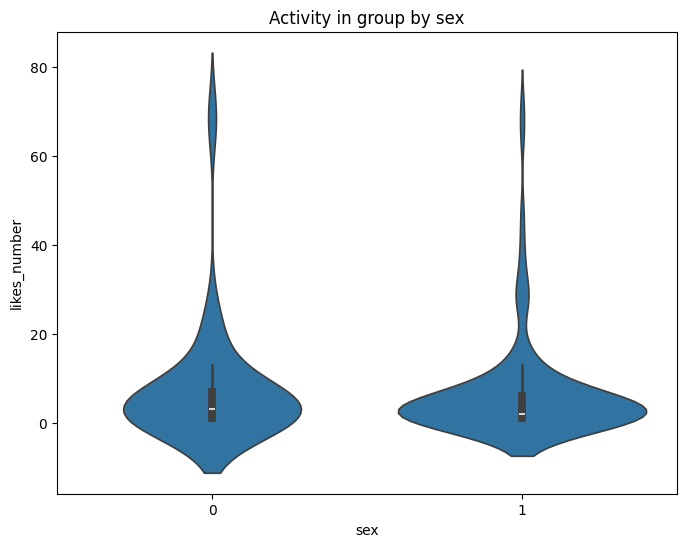

In [29]:
# activity in group by sex

plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='likes_number', data=info_filtered[info_filtered['likes_number'] < 100])
plt.title("Activity in group by sex")
plt.show()

# info_filtered.sort_values('likes_number', ascending=False)

Text(0.5, 1.0, 'Распределение полов')

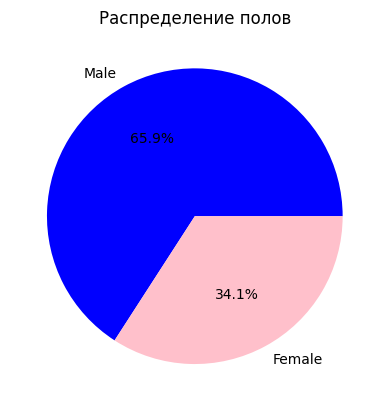

In [30]:
fig, ax = plt.subplots()
ax.pie(users['sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', colors=['blue', 'pink'])
ax.set_title("Распределение полов")

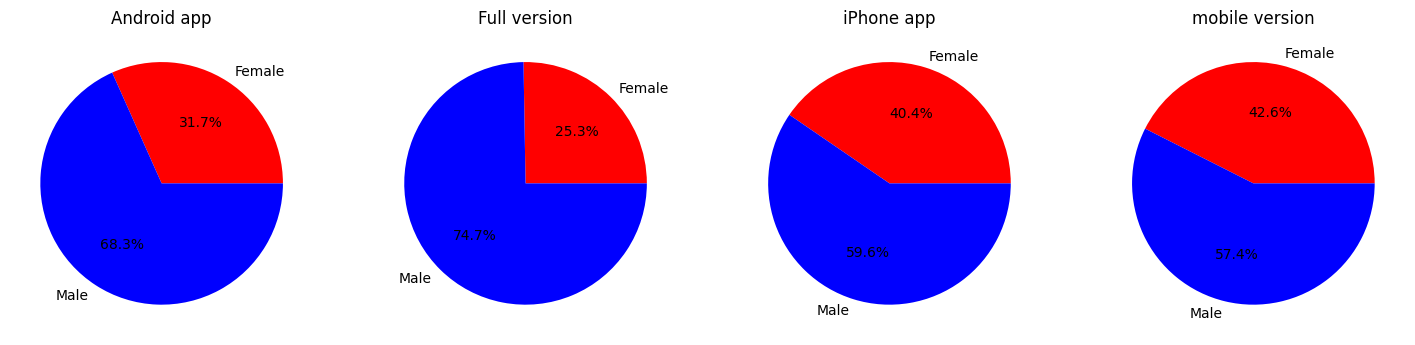

In [31]:
sex_platform = users.groupby(['sex', 'last_seen_platform']).size().reset_index().rename(columns={0: 'size'})


android_users = sex_platform[sex_platform['last_seen_platform'] == 'Android app']
plats = sex_platform['last_seen_platform'].unique()


fig, ax = plt.subplots(1, 4, figsize=(18,5))

for i in range(4):
    plat_users = sex_platform[sex_platform['last_seen_platform'] == plats[i]]
    ax[i].set_title(plats[i])
    ax[i].pie(plat_users['size'], labels=['Female', 'Male'], autopct='%1.1f%%', colors=['red', 'blue'])
